In [91]:
import argparse
import re
import numpy as np
#import matplotlib.pyplot as plt
import six.moves.cPickle as pickle
import matplotlib.pyplot as plt

np.random.seed(1234)

In [92]:
class bbhparams:
    def __init__(self,mc,m1,m2,ra,dec,cosi,psi,tc,snr,SNR):
        self.mc = mc
        self.m1 = m1
        self.m2 = m2
        self.ra = ra
        self.dec = dec
        self.cosi = psi
        self.tc = tc
        self.snr = snr
        self.SNR = SNR

In [93]:
def sigma (n, p):
    s = np.sqrt(n*p*(1-p))
    return s

In [94]:
def std_array (m, p):
    s = np.empty(shape=(m.reshape(m.size,)).shape)
    for i,e in enumerate(m.reshape(m.size,)):
        s[i] = sigma(e,p)
    return s.reshape(m.shape)

In [95]:
# Load datasets
snr_choice = '8'
run = 15

with open('./history/SNR{0}/run{1}/args.pkl'.format(snr_choice,run), 'rb') as rfp:
    args = pickle.load(rfp)
    
dataset_name = args.test_dataset.split('ts')[0]
    
preds = np.around(np.load('./history/SNR{0}/run{1}/preds.npy'.format(snr_choice,run))[:,1])
targets = np.load('./history/SNR{0}/run{1}/targets.npy'.format(snr_choice,run))[:,1]

In [96]:
# declare variables
signals = []
parameters = []
accuracy = []
dataset_size = 10000.
count = args.Nvalidation
input_f_nums = np.ceil(count/dataset_size)
print input_f_nums

for idx in range(int(input_f_nums)):
    with open('{0}ts_{1}.sav'.format(dataset_name,idx), 'rb') as rfp:
        data_flags = pickle.load(rfp)[1]
    with open('{0}params_{1}.sav'.format(dataset_name,idx), 'rb') as rfp:
        params = pickle.load(rfp)
        
for i, flag in enumerate(data_flags):
    if flag == True:
        count_idx = count - 10000 + i
        signals.append(data_flags[i])
        p = params[i] 
        parameters.append([p.m1, p.m2])
        if preds[count_idx] == targets[count_idx]:
            accuracy.append(True)
        elif preds[count_idx] != targets[count_idx]:
            accuracy.append(False)
    #count = count + 7000

1.0


In [97]:
x = []
y = []
for i in parameters: 
    x.append(i[0])
    y.append(i[1])

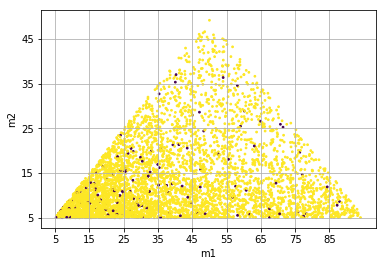

In [98]:
# plot shit
plt.scatter(x,y, s=3, c=accuracy)
plt.xticks(np.arange(5, max(x), 10))
plt.yticks(np.arange(5, max(y), 10))
plt.grid()
plt.xlabel('m1')
plt.ylabel('m2')
plt.savefig('./history/SNR{0}/run{1}/m1m2_results_scatter.png' .format(snr_choice,run), format='png', dpi=1200)
plt.show()

In [99]:
# get only true and false x/y values

true_x = []
true_y = []
false_x = []
false_y = []

for idx, a in enumerate(accuracy):
    if a == True:
        true_x.append(x[idx])
        true_y.append(y[idx])
    if a == False:
        false_x.append(x[idx])
        false_y.append(y[idx])

In [100]:
xedges = [5, 15, 25, 35, 45, 55, 65, 75, 85, 95]
yedges = [5, 15, 25, 35, 45, 55, 65, 75, 85, 95]

H_t, xedges, yedges = np.histogram2d(true_x, true_y, bins=(xedges,yedges))
H_t = H_t.T
H_f, xedges, yedges = np.histogram2d(false_x, false_y, bins=(xedges,yedges))
H_f = H_f.T

/home/2136420/theanoenv/lib/python2.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in divide
  """


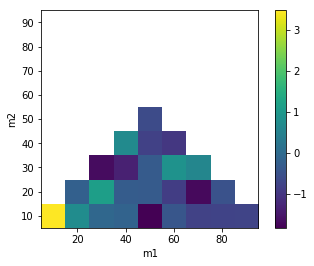

In [101]:
hist_sum = np.add(H_f, H_t)
p = np.sum(accuracy) / float(len(accuracy))
stdm = std_array(hist_sum,p)

M = np.divide((p*hist_sum)-H_t,stdm)

plt.imshow(M, interpolation='nearest', origin='low', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])
plt.colorbar()
plt.xlabel('m1')
plt.ylabel('m2')
plt.savefig('./history/SNR{0}/run{1}/2d_hist.png'.format(snr_choice, run), format='png', dpi=1200)
plt.show()